# Pandas

In [ ]:
import pandas as pd

In [2]:
example_series = pd.Series([10, 20, 30, 40])
print(example_series)

date = {
    "Product": ["Laptop", "Mouse", "Keyboard", "Monitor"],
    "Price": [1000, 20, 50, 200]
}
df_example = pd.DataFrame(date)
print(df_example)

0    10
1    20
2    30
3    40
dtype: int64
    Product  Price
0    Laptop   1000
1     Mouse     20
2  Keyboard     50
3   Monitor    200


# Creating and manipulating Dataframes

In [9]:
date = {
    "Name": ["Alice", "Bob", "Charlie", "Diana"],
    "Age": [25, 30, 35, 40],
    "City": ["Roma", "Milano", "Napoli", "Torino"]
}

df = pd.DataFrame(date)
print(df)
print()

df_indexed = df.set_index("Name")
print(df_indexed)
print()

name = df["Name"]
print(name)
print()

selected_data = df[["Name", "Age"]]
print(selected_data)
print()

extract_loc = df_indexed.loc["Alice": "Charlie", ["Age", "City"]]
print(extract_loc)
print()

extract_iloc = df.iloc[0:2, 0:2]
print(extract_iloc)
print()

      Name  Age    City
0    Alice   25    Roma
1      Bob   30  Milano
2  Charlie   35  Napoli
3    Diana   40  Torino

         Age    City
Name                
Alice     25    Roma
Bob       30  Milano
Charlie   35  Napoli
Diana     40  Torino

0      Alice
1        Bob
2    Charlie
3      Diana
Name: Name, dtype: object

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35
3    Diana   40

         Age    City
Name                
Alice     25    Roma
Bob       30  Milano
Charlie   35  Napoli

    Name  Age
0  Alice   25
1    Bob   30



# Basic DataFrame Operations

In [18]:
date = {
    "Name": ["Alice", "Bob", "Charlie", "Diana"],
    "Age": [25, 30, 35, 40],
    "City": ["Roma", "Milano", "Napoli", "Torino"]
}

df = pd.DataFrame(date)
print(df)
print()

age_filter = df["Age"] > 30
df_filtered = df[age_filter]
print(df_filtered)
print()

# Ordiniamo i DataFrame

df_ordered = df.sort_values(by="Age") # dal piú piccolo al piú grande
print(df_ordered)
print()

df_ordered = df.sort_values(by="Age", ascending=False) # dal piú grande al piú piccolo
print(df_ordered)
print()

df_multi_ordered = df.sort_values(by=["City", "Age"])
print(df_multi_ordered)
print()

df_multi_ordered = df.sort_values(by=["City", "Age"], ascending=False)
print(df_multi_ordered)
print("\n")

df.sort_values(by="Age", inplace=True)
print(df_multi_ordered)
print(df)

      Name  Age    City
0    Alice   25    Roma
1      Bob   30  Milano
2  Charlie   35  Napoli
3    Diana   40  Torino

      Name  Age    City
2  Charlie   35  Napoli
3    Diana   40  Torino

      Name  Age    City
0    Alice   25    Roma
1      Bob   30  Milano
2  Charlie   35  Napoli
3    Diana   40  Torino

      Name  Age    City
3    Diana   40  Torino
2  Charlie   35  Napoli
1      Bob   30  Milano
0    Alice   25    Roma

      Name  Age    City
1      Bob   30  Milano
2  Charlie   35  Napoli
0    Alice   25    Roma
3    Diana   40  Torino

      Name  Age    City
3    Diana   40  Torino
0    Alice   25    Roma
2  Charlie   35  Napoli
1      Bob   30  Milano


      Name  Age    City
3    Diana   40  Torino
0    Alice   25    Roma
2  Charlie   35  Napoli
1      Bob   30  Milano
      Name  Age    City
0    Alice   25    Roma
1      Bob   30  Milano
2  Charlie   35  Napoli
3    Diana   40  Torino


In [20]:
groups = df.groupby("City")
average_age = groups["Age"].mean()
print(average_age)
print()

count = groups.size()
print(count)
print()

City
Milano    30.0
Napoli    35.0
Roma      25.0
Torino    40.0
Name: Age, dtype: float64

City
Milano    1
Napoli    1
Roma      1
Torino    1
dtype: int64



In [22]:
df_filter = df[df["Age"] > 25]
average_age = df_filter.groupby("City")["Age"].mean().sort_values()
print(average_age)
print()

City
Milano    30.0
Napoli    35.0
Torino    40.0
Name: Age, dtype: float64



# Read and write CSV, Excel and other formats files

In [28]:
df_csv = pd.read_csv("foo.csv")
print(df_csv.head())

df_csv.to_csv("foo.csv", index=False)
print(df)

df_excel = pd.read_excel("foo.xlsx", sheet_name="January")
print(df_excel.head())

df_excel.to_excel("foo.xlsx", index=False, sheet_name="Risult")

      Name  Age    City
0    Alice   25    Roma
1      Bob   30  Milano
2  Charlie   35  Napoli
3    Diana   40  Torino
      Name  Age    City
0    Alice   25    Roma
1      Bob   30  Milano
2  Charlie   35  Napoli
3    Diana   40  Torino


ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [32]:
df_json = pd.read_json("foo.json")
print(df_json.head())
df_json.to_json("foo.json")

ValueError: Expected object or value

# Data cleaning and preparation

In [36]:
data = {
    "Name": ["Alice", "Bob", None, "Diana"],
    "Age": [25, None, 35, 40],
    "City": ["Roma", "Milano", "Napoli", None]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
print("\nMissing values (True indicates a missing value):")
print(df.isnull())
print()

df_dropna = df.dropna()
print("\nDataFrame after removing rows with missing values:")
print(df_dropna)

average_age = df["Age"].mean()
df["Age"] = df["Age"].fillna(average_age)

df["Name"] = df["Name"].fillna("Unknown")
df["City"] = df["City"].fillna("Not specified")
print("\nDataFrame after replacing missing values:")
print(df)

Original DataFrame:
    Name   Age    City
0  Alice  25.0    Roma
1    Bob   NaN  Milano
2   None  35.0  Napoli
3  Diana  40.0    None

Missing values (True indicates a missing value):
    Name    Age   City
0  False  False  False
1  False   True  False
2   True  False  False
3  False  False   True


DataFrame after removing rows with missing values:
    Name   Age  City
0  Alice  25.0  Roma

DataFrame after replacing missing values:
      Name        Age           City
0    Alice  25.000000           Roma
1      Bob  33.333333         Milano
2  Unknown  35.000000         Napoli
3    Diana  40.000000  Not specified


In [39]:
data_convert = {
    "Year": ["2020", "2021", "2022"],
    "Sales": ["1000", "1500", "2000"]
}

df_convert = pd.DataFrame(data_convert)
print("DataFrame before conversion:")
print(df_convert)
print()

df_convert["Year"] = df_convert["Year"].astype(int)
df_convert["Sales"] = df_convert["Sales"].astype(float)

print("DataFrame after type conversion:")
print(df_convert)

DataFrame before conversion:
   Year Sales
0  2020  1000
1  2021  1500
2  2022  2000

DataFrame after type conversion:
   Year   Sales
0  2020  1000.0
1  2021  1500.0
2  2022  2000.0


In [41]:
data_names = {
    "Name": ["alice", "BOB", "ChArLiE", "dIaNa"]
}

df_names = pd.DataFrame(data_names)
print("Names before transformation:")
print(df_names)

df_names["Name"] = df_names["Name"].str.title()
print("\nNames after transformation:")
print(df_names)

#------------------------------------------------------------
def add_suffix(name):
    return name + " (Customer)"

df_names["Name"] = df_names["Name"].apply(add_suffix)
print("\nNames after applying custom function:")
print(df_names)

Names before transformation:
      Name
0    alice
1      BOB
2  ChArLiE
3    dIaNa

Names after transformation:
      Name
0    Alice
1      Bob
2  Charlie
3    Diana

Names after applying custom function:
                 Name
0    Alice (Customer)
1      Bob (Customer)
2  Charlie (Customer)
3    Diana (Customer)


# Practical exercises with Pandas

In [11]:
import pandas as pd

data = {
    "Name": ["Alice", "Bob", "Charlie", "Diana", None],
    "Age": [25, 30, None, 40, 28],
    "City": ["Roma", "Milano", "Napoli", None, "Torino"]
}

df = pd.DataFrame(data)
print("nOriginal DataFrame:")
print(df)

df_selected = df[["Name", "Age"]]
print("DataFrame with only 'Name' and 'Age':")
print(df_selected)

df_filtered = df[df["Age"].notnull() & (df["Age"] >= 30)]
print("\nFiltered DataFrame (Age >= 30):")
print(df_filtered)

df_dropna = df.dropna()
print("\nDataFrame after removing rows with missing values:")
print(df_dropna)

average_age = df["Age"].mean()
df_filled = df.copy()
df_filled["Age"] = df_filled["Age"].fillna(average_age)
df_filled["Name"] = df_filled["Name"].fillna("Unknown")
df_filled["City"] = df_filled["City"].fillna("Not specified")

print("\nDataFrame after replacing missing values:")
print(df_filled)

df_filled["Age"] = df_filled["Age"].round().astype(int)
df_t = df_filled.rename(columns={"Name": "Full_Name", "Age": "Age_Years", "City": "City_Residence"})

#------------------------------------------------------------------------------------------------------------------------------
def c_age(age):
    if age < 35:
        return "Young"
    else:
        return "Mature"

df_t["Category"] = df_t["Age_Years"].apply(c_age)
print("\nDataFrame after transformations:")
print(df_t)

nOriginal DataFrame:
      Name   Age    City
0    Alice  25.0    Roma
1      Bob  30.0  Milano
2  Charlie   NaN  Napoli
3    Diana  40.0    None
4     None  28.0  Torino
DataFrame with only 'Name' and 'Age':
      Name   Age
0    Alice  25.0
1      Bob  30.0
2  Charlie   NaN
3    Diana  40.0
4     None  28.0

Filtered DataFrame (Age >= 30):
    Name   Age    City
1    Bob  30.0  Milano
3  Diana  40.0    None

DataFrame after removing rows with missing values:
    Name   Age    City
0  Alice  25.0    Roma
1    Bob  30.0  Milano

DataFrame after replacing missing values:
      Name    Age           City
0    Alice  25.00           Roma
1      Bob  30.00         Milano
2  Charlie  30.75         Napoli
3    Diana  40.00  Not specified
4  Unknown  28.00         Torino

DataFrame after transformations:
  Full_Name  Age_Years City_Residence Category
0     Alice         25           Roma    Young
1       Bob         30         Milano    Young
2   Charlie         31         Napoli    Young
3  

# Introduction to Matplotlib

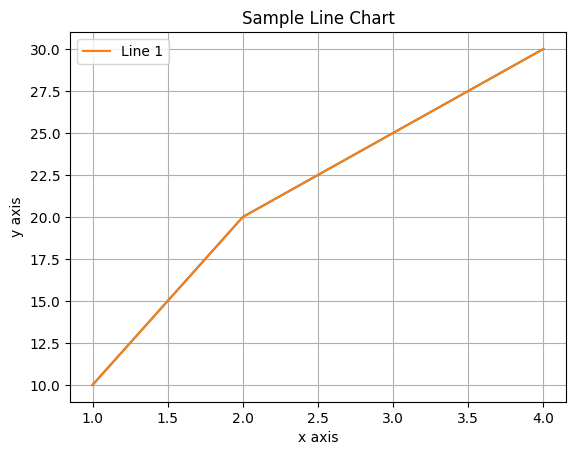

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

ax.plot(x, y)
ax.set_title("Sample Line Chart")
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")

ax.grid(True)

ax.plot(x, y, label="Line 1")
ax.legend()

plt.show()